In [1]:

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
import random
import sys
import seaborn as sns
import pandas as pd
import prelim_fig_funcs

# make sure you have "binAges_HUMAN.csv" from the google drive
# then run "preprocess/convert_multiple_gene_age_data_into_dict.py"
# then make sure you have "data/function_to_genes_all_in_simplified.p" from the google drive
# then run "save_function_to_age_pickle.py with the data from multiple datasets setting
# to get the pickle files we'll be using 

dataset_to_gene_to_age_dict = pickle.load(open("data/dataset_to_gene_to_age_dict.p","rb"))  
dataset_list = dataset_to_gene_to_age_dict.keys()
print dataset_list

['PANTHER8_all', 'EggNOG', 'InParanoidCore', 'Hieranoid_2', 'RSD', 'OMA_Groups', 'Orthoinspector', 'OMA_Pairs', 'PhylomeDB', 'Metaphors', 'InParanoid', 'PANTHER8_LDO', 'EnsemblCompara_v2']


In [2]:
(keys,values) = zip(*dataset_to_gene_to_age_dict[dataset_list[0]].iteritems())
common_genes = [g for g, age in zip(keys, values) if age != None] #non null genes for first dataset

for dataset in dataset_list[1:]:
    (keys,values) = zip(*dataset_to_gene_to_age_dict[dataset].iteritems())
    curr_genes = [g for g, age in zip(keys, values) if age != None]
    common_genes = set(common_genes) & set(g)
    
print common_genes
print len(common_genes) # no common genes between all datasets

set([])
0


In [3]:
total_unique_genes = len(dataset_to_gene_to_age_dict[dataset_list[0]]) #counts the Nones too

In [4]:
corr_matrix = np.zeros([len(dataset_list),len(dataset_list)])
num_genes_in_common_matrix = np.zeros([len(dataset_list),len(dataset_list)])

for i in xrange(0,len(dataset_list)):
    for j in xrange(0,len(dataset_list)):
        (keys,values) = zip(*dataset_to_gene_to_age_dict[dataset_list[i]].iteritems())
        genes1 = [g for g, age in zip(keys, values) if age != None] 
        (keys,values) = zip(*dataset_to_gene_to_age_dict[dataset_list[j]].iteritems())
        genes2 = [g for g, age in zip(keys, values) if age != None] 
        common_genes = set(genes1) & set(genes2)
        ages1 = [dataset_to_gene_to_age_dict[dataset_list[i]][gene] for gene in common_genes]
        ages2 = [dataset_to_gene_to_age_dict[dataset_list[j]][gene] for gene in common_genes]
        corr = np.corrcoef(ages1,ages2)[0][1]
        corr_matrix[i][j] = corr
        corr_matrix[j][i] = corr
        num_genes_in_common_matrix[i][j] = len(common_genes)/float(total_unique_genes)
        num_genes_in_common_matrix[j][i] = len(common_genes)/float(total_unique_genes)

Text(0.5,1,u'Correlation (Pearson) Between Ages Given by Diff Datasets')

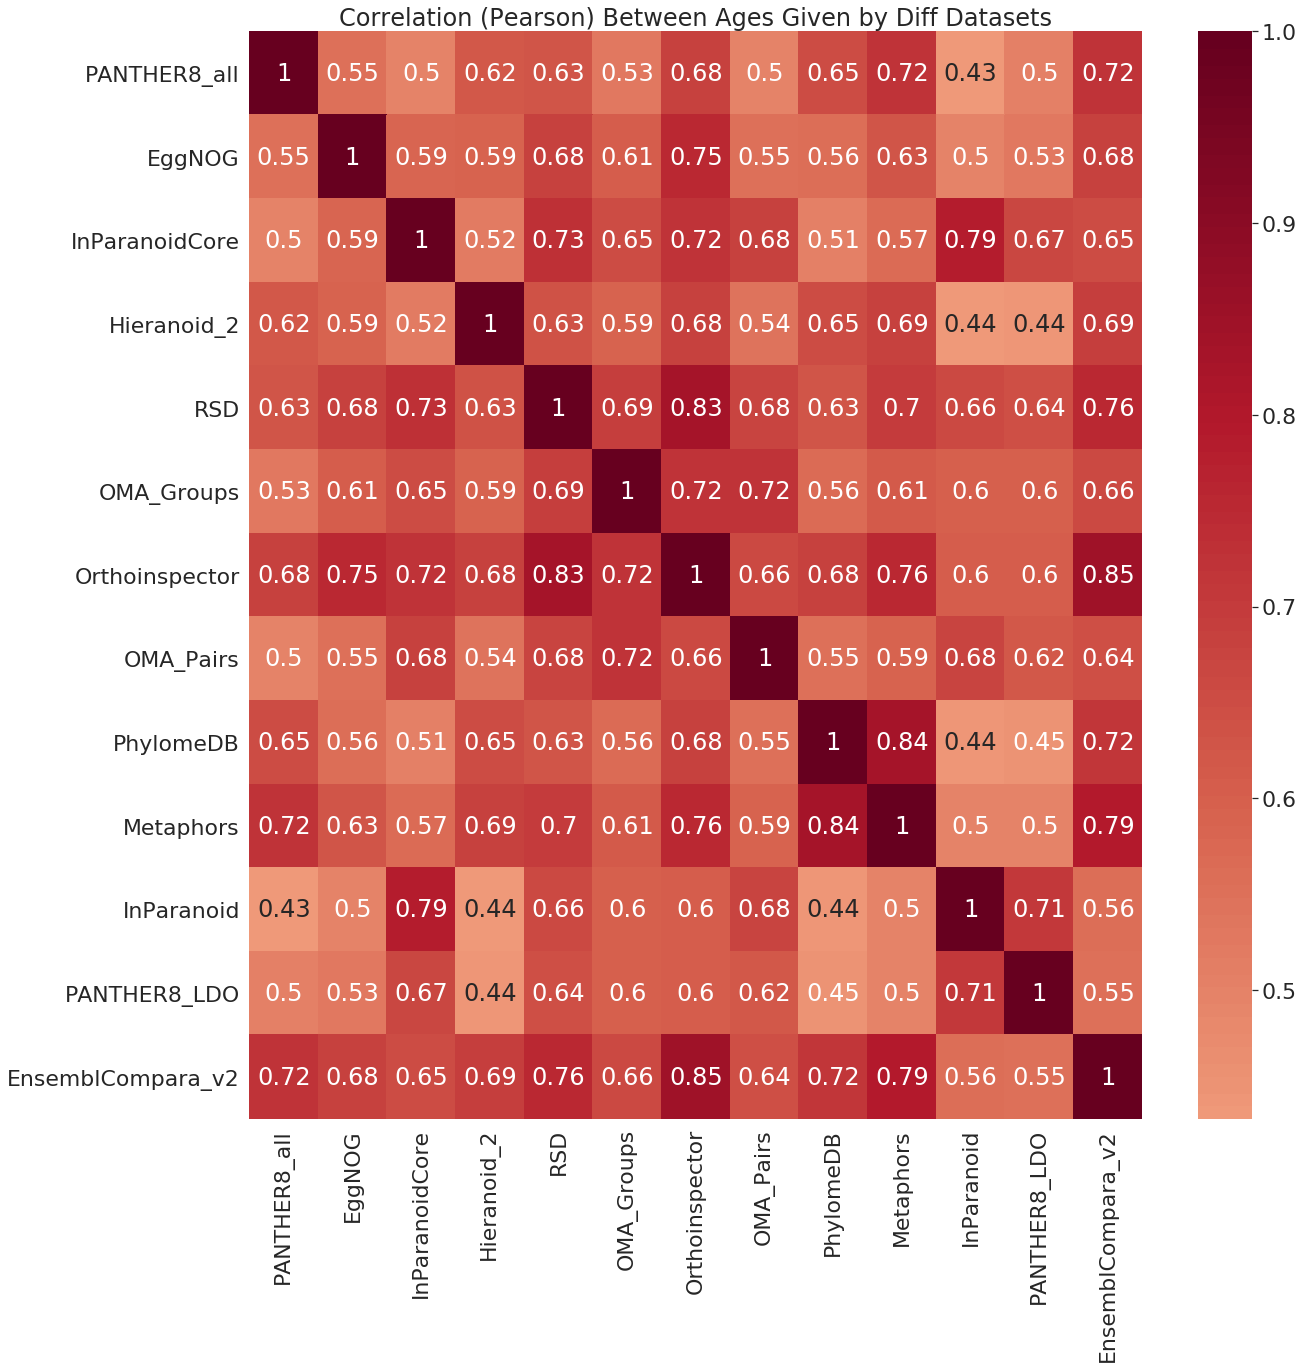

In [17]:
sns.set(font_scale=2)
plt.rcParams['figure.figsize'] = [20, 20]
ax = sns.heatmap(corr_matrix, center=0,annot=True,cmap="RdBu_r")
ax.set_yticklabels(dataset_list, rotation='horizontal')
ax.set_xticklabels(dataset_list, rotation='vertical')
ax.set_title("Correlation (Pearson) Between Ages Given by Diff Datasets")

Text(0.5,1,u'Genes in Common Between Datasets/ Total Unique Genes')

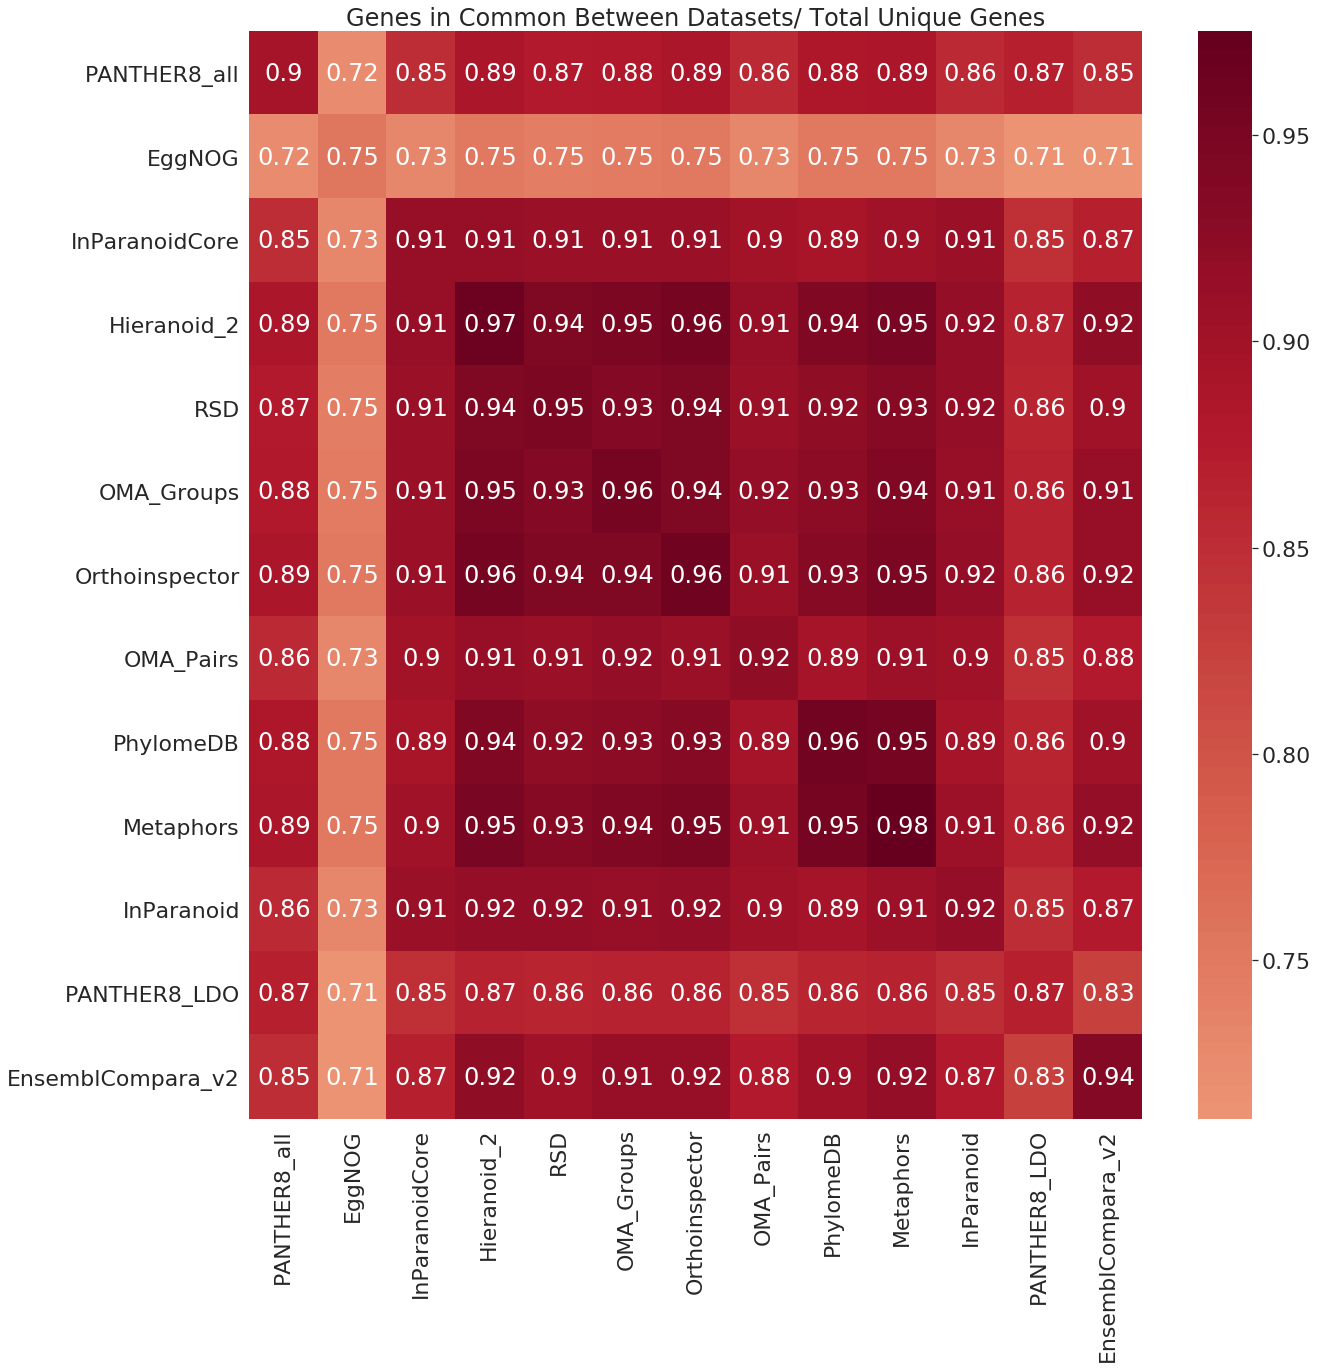

In [18]:
ax = sns.heatmap(num_genes_in_common_matrix,center=0.5,annot=True,cmap="RdBu_r")
ax.set_yticklabels(dataset_list, rotation='horizontal')
ax.set_xticklabels(dataset_list, rotation='vertical')
ax.set_title("Genes in Common Between Datasets/ Total Unique Genes")

In [7]:
flights = sns.load_dataset("flights")

In [8]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119
